In [46]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [47]:
len(train_data) #8982
len(test_data) # 2246

2246

In [48]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

In [49]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [50]:
# Labels are ints between 0 and 45, a topic index

train_labels[10]

3

In [51]:
# vectorize the data, same as last time

In [52]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [53]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
# categorical vectorization is also build in to keras

from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

The output space here is much larger than the prior problem - 46-D multiclass classification versus binary classification. Therefore, we'll need a larger hidden layer of the NN, since the last layer has 46 nodes. 

- note that softmax activation means the output is a probability distribution of all outputs that sums to 1

In [55]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 24ms/step - loss: 2.5923 - accuracy: 0.5239 - val_loss: 1.6899 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.3690 - accuracy: 0.7075 - val_loss: 1.2646 - val_accuracy: 0.7270
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0054 - accuracy: 0.7752 - val_loss: 1.1113 - val_accuracy: 0.7730
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.7837 - accuracy: 0.8300 - val_loss: 1.0107 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6199 - accuracy: 0.8695 - val_loss: 0.9440 - val_accuracy: 0.8080
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4967 - accuracy: 0.8983 - val_loss: 0.9332 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.3980 - accuracy: 0.9187 - val_loss: 0.9376 - val_accuracy: 0.8060
Epoch 8/20
16

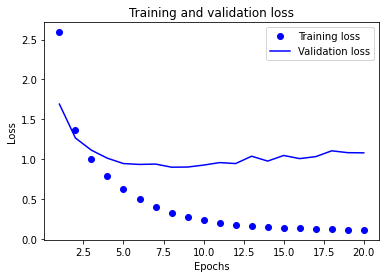

In [57]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [58]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 22ms/step - loss: 2.4120 - accuracy: 0.5471 - val_loss: 1.5700 - val_accuracy: 0.6650
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.3076 - accuracy: 0.7228 - val_loss: 1.2556 - val_accuracy: 0.7240
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 0.9941 - accuracy: 0.7888 - val_loss: 1.1092 - val_accuracy: 0.7650
Epoch 4/9
16/16 [==============================] - 0s 15ms/step - loss: 0.7917 - accuracy: 0.8299 - val_loss: 1.0381 - val_accuracy: 0.7750
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.6323 - accuracy: 0.8678 - val_loss: 1.0036 - val_accuracy: 0.7780
Epoch 6/9
16/16 [==============================] - 0s 15ms/step - loss: 0.5080 - accuracy: 0.8939 - val_loss: 0.9322 - val_accuracy: 0.8060
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.4111 - accuracy: 0.9139 - val_loss: 0.9062 - val_accuracy: 0.7990
Epoch 8/9
16/16 [===

In [59]:
results

[1.0108864307403564, 0.7809438705444336]

In [60]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18388245770258238

In [61]:
predictions = model.predict(x_test)
predictions[0].shape
np.sum(predictions[0]) # sums to 1
np.argmax(predictions[0])

3

In [63]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [64]:
# This network fails because it crunches down to 4 neurons before the last layer

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 2.6834 - accuracy: 0.3648 - val_loss: 2.0009 - val_accuracy: 0.4510
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 1.7370 - accuracy: 0.5629 - val_loss: 1.6014 - val_accuracy: 0.6070
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 1.4345 - accuracy: 0.6253 - val_loss: 1.4731 - val_accuracy: 0.6250
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.2853 - accuracy: 0.6512 - val_loss: 1.4169 - val_accuracy: 0.6530
Epoch 5/20
63/63 [==============================] - 1s 10ms/step - loss: 1.1887 - accuracy: 0.6790 - val_loss: 1.4199 - val_accuracy: 0.6540
Epoch 6/20
63/63 [==============================] - 1s 10ms/step - loss: 1.1144 - accuracy: 0.6988 - val_loss: 1.4006 - val_accuracy: 0.6650
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 1.0527 - accuracy: 0.7140 - val_loss: 1.4295 - val_accuracy: 0.6700
Epoch 8/20
63/63